# 章節 14：階層式模型

## 14.2 從簡單開始

我們先從簡單的版本開始。假設我們已知 r。我們給定 f ，接下來要做的就是估計 n。這邊定義了 Detector 類別來模擬計數器和估計 n。

r= 100
後驗分佈的最大似然性： 104


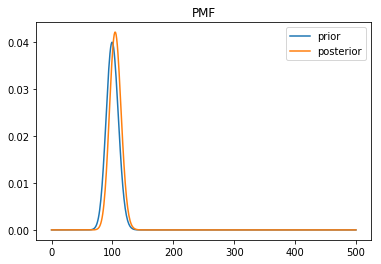

r= 250
後驗分佈的最大似然性： 239


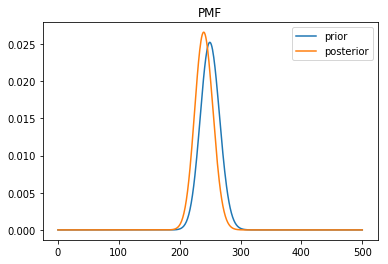

r= 400
後驗分佈的最大似然性： 375


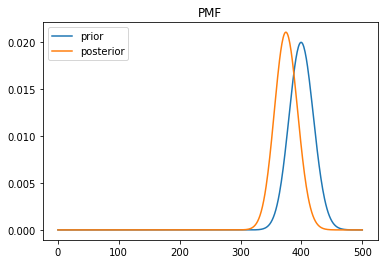

In [14]:
import thinkbayes as tb
import matplotlib.pyplot as plt

def plot_dist(dist, c=None):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y, c=c)

class Detector(tb.Suite):
    
    def __init__(self, r, f, high=500, step=1):
        
        # r 表示平均發射頻率
        # high：最高可能的粒子數
        # step：發射量的間距
        
        # n 服從 Poisson 分佈
        pmf = tb.MakePoissonPmf(r, high, step=step)
        super().__init__(pmf, name=r)
        
        self.r = r
        self.f = f
        
    
    def Likelihood(self, data, hypo):
        # data: 多少顆粒被偵測到
        k = data
        
        # hypo: 假設發射出 n 顆粒子
        n = hypo
        
        # p: 偵測率
        p = self.f
        
        # 假設發出 n 顆粒子，在偵測率 p 的情況下，實際被偵測到 k 顆粒子的似然性
        return tb.EvalBinomialPmf(k, n, p)

# 假設給定
f = 0.1
k = 15
rs = [100, 250, 400] # 粒子數/秒



for r in rs:
    suite = Detector(r, f, step=1)
    plot_dist(suite)
    suite.Update(k)
    
    plot_dist(suite)
    plt.title("PMF")
    plt.legend(["prior", "posterior"])
    print("r=", r)
    print("後驗分佈的最大似然性：", suite.MaximumLikelihood())
    plt.show()